## Unit 3. Classification

Churn prediction: analysing customer data to see which people might leave to stop them from going to our competitors

### 3.1 Dataset

Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

### 3.2 Data preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Download data
data = 'https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
#!wget $data -O 03-classification-data.csv

In [3]:
# Read the data
df = pd.read_csv('03-classification-data.csv')
df.head()

ERROR! Session/line number was not unique in database. History logging moved to new session 14


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Transpose the dataset to see all columns - rows and columns change places
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
# Unifying the text for columns
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [6]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [7]:
# Check datatypes
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
# This column contains something that is not a number, that's why it is marked as an object in the previous output
# pd.to_numeric(df.totalcharges)

In [9]:
# Ignoring anything that is not a number
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [11]:
# Finding the missing values and filling them with 0s
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges.fillna(0)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [12]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [13]:
# Looking at values as True or False
(df.churn == 'yes').head()

# Replacing Yes and No with 1 and 0
df.churn = (df.churn == 'yes').astype(int)

### 3.3 Validation framework

In [14]:
# Importing SciKit learn packages to be used
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [16]:
len(df_full_train), len(df_test)

(5634, 1409)

In [17]:
# Test size is bigger because we now get a part of 80% of total data
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [18]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [19]:
# Reseting the index of datasets
df_val = df_val.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
df_val = df_val.fillna(0)
df_test = df_test.fillna(0)

In [21]:
# Clearning some NAs in the dataset
df_train = df_train.fillna(0)

In [22]:
# Defining what values we need to predict
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [23]:
# Deleting the value to predict to avoid using it in the model
del df_train['churn']
del df_val['churn']
del df_test['churn']

### 3.4 Exploratory data analysis

In [24]:
df_full_train = df_full_train.reset_index(drop=True)

In [25]:
# Looking for missing values
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        8
churn               0
dtype: int64

In [26]:
# Distribution of the value
df_full_train.churn.value_counts(normalize=True) # Using percentages

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [27]:
# We can calculate mean to find the churn rate
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [28]:
# Look at categorical variables
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [29]:
# Creating a list of all numerical values
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [30]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [31]:
# List of categorical variables
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [32]:
# Looking at only categorical variables
df_full_train[categorical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,male,0,yes,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
1,female,0,no,no,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic)
2,male,0,yes,no,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic)
3,male,0,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check
4,male,0,no,no,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,male,1,no,no,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check
5630,male,0,no,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
5631,male,0,no,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check
5632,male,0,no,no,yes,yes,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check


In [33]:
# Checking how many unique values there are in each category
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### 3.5 Feature importance: Churn rate and risk ratio

In [34]:
# What groups of people are there? Can we look at the churn rate for separate groups instead of globally?
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [35]:
# All female customers
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [36]:
# All male customers
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [37]:
# Customers with partners
churn_partner_yes = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner_yes

np.float64(0.20503330866025166)

In [38]:
# Customers without partners
churn_partner_no = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_partner_no

np.float64(0.3298090040927694)

In [39]:
#################################################
# Difference between Global and Group churn rate:
# < 0: more likely to churn
# > 0: less likely to churn
################################################

In [40]:
#################################################
# Risk ratio: Group churn / Global churn
# > 1: more likely to churn
# < 1: less likely to churn
################################################

In [41]:
# Implementing the query from above in pandas
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
# Adding columns manually for AVG values manually
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [42]:
# Using a function to display df_group from the lopp
from IPython.display import display

In [43]:
# Implementing the same for all categorical variables, not just gender
for c in categorical:
    # Implementing the query from above in pandas
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    # Adding columns manually for AVG values manually
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


### 3.6 Mutual information

In [44]:
# Importing a function from SciKit learn that implements MI
from sklearn.metrics import mutual_info_score

In [45]:
# The valueis big, so it is important
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [46]:
# The order of variables does not matter
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [47]:
# The value is small, so it is not important
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [48]:
# Creating the function to learn which ones are more important
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [49]:
# Applying the defined function to only categorical variables
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### 3.7 Correlation

In [50]:
df_full_train.tenure.max()

np.int64(72)

In [51]:
# Calculating correlation coefficient of each numerical value and churn
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.197416
dtype: float64

In [52]:
# Selecting people who are with the company for less than 2 months and calculating their churn rate
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [53]:
# Between 2 and 12 months
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [54]:
# More than 12 months
df_full_train[(df_full_train.tenure > 12)].churn.mean()

np.float64(0.17634908339788277)

In [55]:
# Less than 20 dollars paying per month
df_full_train[(df_full_train.monthlycharges <= 20)].churn.mean()

np.float64(0.08795411089866156)

In [56]:
# Between 20 and 50 dollars
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [57]:
# More than 50 dollars
df_full_train[(df_full_train.monthlycharges > 50)].churn.mean()

np.float64(0.32499341585462205)

### 3.8 One-Hot Encoding

Converting categorical variables into binary format. More: https://www.geeksforgeeks.org/machine-learning/ml-one-hot-encoding/

In [58]:
from sklearn.feature_extraction import DictVectorizer

In [59]:
# Looking at first ten values
df_train[['gender', 'contract']].iloc[:100]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
...,...,...
95,male,one_year
96,female,month-to-month
97,male,month-to-month
98,male,one_year


In [60]:
# Turning row-wise into dictionary
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [61]:
dv = DictVectorizer()

In [62]:
# Train (show) how the data looks like
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,True
,sort,True


In [63]:
dv.transform(dicts)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 200 stored elements and shape (100, 5)>

More on sparse matrix: https://en.wikipedia.org/wiki/Sparse_matrix

Not using a sparse matrix for this example

In [64]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [65]:
# How to read each column in the previous output
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

**Note:** numerical values are left intact

In [66]:
# Getting all categorical and numerical values
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts

[{'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 72,
  'monthlycharges': 115.5,
  'totalcharges': 8425.15},
 {'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'month-to-month',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 10,
  'monthlycharges': 95.25,
  'totalcharges': 1021.55},
 {'gender

In [67]:
dv_train = DictVectorizer(sparse=False)
dv_train.fit(train_dicts)
dv_train.transform(train_dicts[:5])

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.15500e+02, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.52500e+01, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.0

In [68]:
# We can fit the dictionary and immidietely transform it
X_train = dv_train.fit_transform(train_dicts)
X_train.shape

(4225, 45)

In [69]:
# Doing the same for the validation dataset
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv_train.transform(val_dicts)

### 3.9 Logistic regression

In [70]:
# How sigmoid function looks like
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [71]:
z = np.linspace(-5, 5, 51)
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

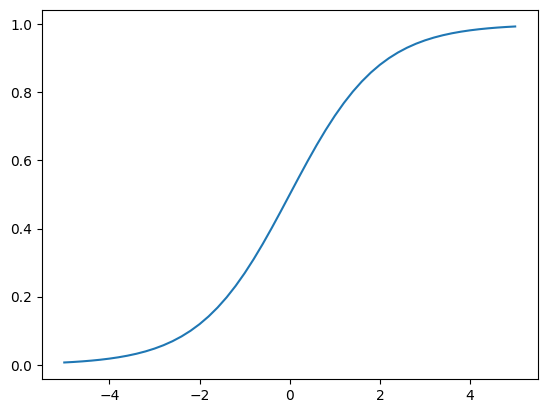

In [72]:
plt.plot(z, sigmoid(z))

In [73]:
# How to implement linear regression
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

# How to implement logistic regression
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]
            
    result = sigmoid(score)
    return result

### 3.10 Training logistic regression with Scikit-Learn

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
dicts = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)
model = LogisticRegression()
model.fit(X_train, y_train)

/home/dmitry/Documents/Programming/Python/lm-zoomcamp/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [76]:
model.coef_[0]

array([ 4.74242775e-01, -1.74683084e-01, -4.07336941e-01, -2.98953565e-02,
       -7.78818932e-02,  6.27082428e-02, -8.92355821e-02, -8.12499104e-02,
       -3.43454752e-02, -7.34317745e-02, -3.34764718e-01,  3.16223051e-01,
       -8.92355821e-02,  3.67138786e-03, -2.58149284e-01,  1.41420688e-01,
        8.95134701e-03,  6.25502575e-02, -8.92355821e-02, -8.10919251e-02,
        2.65347146e-01, -8.92355821e-02, -2.83888814e-01, -2.31101399e-01,
        1.23324149e-01, -1.66089070e-01,  5.83118202e-02, -8.69273773e-02,
       -3.20113694e-02,  7.03254640e-02, -5.91639670e-02,  1.41420688e-01,
       -2.49197937e-01,  2.15252243e-01, -1.20131126e-01, -8.92355821e-02,
        1.01589458e-01, -7.07101003e-02, -8.92355821e-02,  5.21684327e-02,
        2.13164776e-01, -8.92355821e-02, -2.31706444e-01, -7.05146827e-02,
        3.83799223e-04])

In [77]:
model.intercept_[0]

np.float64(-0.10913176644533581)

In [78]:
# How to use the model - HARD predictions because we have exact labels
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [79]:
# To learn the probability - soft predictions
model.predict_proba(X_train)

array([[0.90416494, 0.09583506],
       [0.3210407 , 0.6789593 ],
       [0.36668394, 0.63331606],
       ...,
       [0.46853433, 0.53146567],
       [0.9576116 , 0.0423884 ],
       [0.30173516, 0.69826484]], shape=(4225, 2))

First row: probability of being a negative class (non-churning)

Second row: probability of churning (belonging to the positive class)

In [80]:
# Predict based on a chosen threashold
y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)

In [81]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [83]:
# Accuracy: check how many of y_val and churn_decision match
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [84]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred

,probability,prediction,actual
0,0.009001,0,0
1,0.204090,0,0
2,0.211725,0,0
3,0.542751,1,1
4,0.213315,0,0
...,...,...,...
1404,0.313144,0,0
1405,0.039347,0,1
1406,0.136351,0,0
1407,0.799424,1,1


In [86]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.009001,0,0,True
1,0.204090,0,0,True
2,0.211725,0,0,True
3,0.542751,1,1,True
4,0.213315,0,0,True
...,...,...,...,...
1404,0.313144,0,0,True
1405,0.039347,0,1,False
1406,0.136351,0,0,True
1407,0.799424,1,1,True


### 3.11 Model interpretation

In [87]:
model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.265, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.071,  0.   ])

In [91]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [92]:
dv_train.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [93]:
# Joining first element of dv_train with the first element of coef_, etc.
dict(zip(dv_train.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.474),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.407),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.078),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.089),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.335),
 'internetservice=fiber_optic': np.float64(0.316),
 'internetservice=no': np.float64(-0.089),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.141),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.063),
 'onlinebackup=no_internet_service': np.float64(-0.089),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.265),
 'onlinesecurity=no_internet_service': np.float64(-0.089),
 'onlinesecurity=yes'

In [94]:
# Choosing smaller dataset
small = ['contract', 'tenure', 'monthlycharges']

In [96]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [98]:
# Fitting a smaller dataset
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [100]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [103]:
X_train_small = dv_small.transform(dicts_train_small)

In [104]:
# Training
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [105]:
model_small.intercept_[0]

np.float64(-2.477957595284362)

In [108]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [109]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}